In [1]:
import pandas as pd 
import numpy as np 
import json
import re


In [62]:
data_path = '../data/train.jsonl'

data = []
with open(data_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [63]:
data[0]

{'instruction': 'CREATE TABLE Comments (\n    Id number,\n    PostId number,\n    Score number,\n    Text text,\n    CreationDate time,\n    UserDisplayName text,\n    UserId number,\n    ContentLicense text\n)\n\nCREATE TABLE ReviewRejectionReasons (\n    Id number,\n    Name text,\n    Description text,\n    PostTypeId number\n)\n\nCREATE TABLE Badges (\n    Id number,\n    UserId number,\n    Name text,\n    Date time,\n    Class number,\n    TagBased boolean\n)\n\nCREATE TABLE Users (\n    Id number,\n    Reputation number,\n    CreationDate time,\n    DisplayName text,\n    LastAccessDate time,\n    WebsiteUrl text,\n    Location text,\n    AboutMe text,\n    Views number,\n    UpVotes number,\n    DownVotes number,\n    ProfileImageUrl text,\n    EmailHash text,\n    AccountId number\n)\n\nCREATE TABLE TagSynonyms (\n    Id number,\n    SourceTagName text,\n    TargetTagName text,\n    CreationDate time,\n    OwnerUserId number,\n    AutoRenameCount number,\n    LastAutoRename ti

In [64]:
import re

def analyze_sql_complexity(sql_query):
    sql_query_cleaned = "\n".join([line.strip() for line in sql_query.splitlines() if line.strip() and not line.strip().startswith("--")])
    
    # print("SQL Query after removing comments and excess whitespace:")
    # print(sql_query_cleaned)
    # print("\n--- Breakdown of SQL Query Counting ---")

    keywords = r"\b(SELECT|FROM|WHERE|GROUP BY|ORDER BY|JOIN|INNER JOIN|LEFT JOIN|RIGHT JOIN|UNION|EXCEPT|INTERSECT|HAVING|WITH|LIMIT|OFFSET|BETWEEN|IN|IS NULL|IS NOT NULL|DISTINCT|AND|OR|NOT|LIKE|IS|NULL|COUNT|SUM|AVG|MAX|MIN|EXISTS|ANY|ALL|COALESCE|IFNULL|RANK\(\)|DENSE_RANK\(\)|ROW_NUMBER\(\))\b"
    matches = re.findall(keywords, sql_query_cleaned)
    total_lines = len(matches)

    operations = {
        "JOIN": len(re.findall(r"\bJOIN\b", sql_query_cleaned)),
        "INNER JOIN": len(re.findall(r"\bINNER JOIN\b", sql_query_cleaned)),
        "LEFT JOIN": len(re.findall(r"\bLEFT JOIN\b", sql_query_cleaned)),
        "RIGHT JOIN": len(re.findall(r"\bRIGHT JOIN\b", sql_query_cleaned)),
        "CROSS JOIN": len(re.findall(r"\bCROSS JOIN\b", sql_query_cleaned)),
        "SELF JOIN": len(re.findall(r"\bSELF JOIN\b", sql_query_cleaned)),
        "LEFT OUTER JOIN": len(re.findall(r"\bLEFT OUTER JOIN\b", sql_query_cleaned)),
        "RIGHT OUTER JOIN": len(re.findall(r"\bRIGHT OUTER JOIN\b", sql_query_cleaned)),
        "OUTER JOIN": len(re.findall(r"\bOUTER JOIN\b", sql_query_cleaned)),
        "UNION": len(re.findall(r"\bUNION\b", sql_query_cleaned)),
        "UNION ALL": len(re.findall(r"\bUNION ALL\b", sql_query_cleaned)),
        "EXCEPT": len(re.findall(r"\bEXCEPT\b", sql_query_cleaned)),
        "EXCEPT ALL": len(re.findall(r"\bEXCEPT ALL\b", sql_query_cleaned)),
        "INTERSECT": len(re.findall(r"\bINTERSECT\b", sql_query_cleaned)),
        "INTERSECT ALL": len(re.findall(r"\bINTERSECT ALL\b", sql_query_cleaned)),
        "ORDER BY": len(re.findall(r"\bORDER BY\b", sql_query_cleaned)),
        "GROUP BY": len(re.findall(r"\bGROUP BY\b", sql_query_cleaned)),
        "WITH": len(re.findall(r"\bWITH\b", sql_query_cleaned)),  # CTEs
        "HAVING": len(re.findall(r"\bHAVING\b", sql_query_cleaned)),
        "DISTINCT": len(re.findall(r"\bDISTINCT\b", sql_query_cleaned)),
        "LIMIT": len(re.findall(r"\bLIMIT\b", sql_query_cleaned)),
        "OFFSET": len(re.findall(r"\bOFFSET\b", sql_query_cleaned)),
        "LIKE": len(re.findall(r"\bLIKE\b", sql_query_cleaned)),
        "IN": len(re.findall(r"\bIN\b", sql_query_cleaned)),
        "BETWEEN": len(re.findall(r"\bBETWEEN\b", sql_query_cleaned)),
        "IS NULL": len(re.findall(r"\bIS NULL\b", sql_query_cleaned)),
        "IS NOT NULL": len(re.findall(r"\bIS NOT NULL\b", sql_query_cleaned)),
        "NULL": len(re.findall(r"\bNULL\b", sql_query_cleaned)),
        "COUNT": len(re.findall(r"\bCOUNT\b", sql_query_cleaned)),
        "SUM": len(re.findall(r"\bSUM\b", sql_query_cleaned)),
        "AVG": len(re.findall(r"\bAVG\b", sql_query_cleaned)),
        "MAX": len(re.findall(r"\bMAX\b", sql_query_cleaned)),
        "MIN": len(re.findall(r"\bMIN\b", sql_query_cleaned)),
        "EXISTS": len(re.findall(r"\bEXISTS\b", sql_query_cleaned)),
        "ANY": len(re.findall(r"\bANY\b", sql_query_cleaned)),
        "ALL": len(re.findall(r"\bALL\b", sql_query_cleaned)),
        "COALESCE": len(re.findall(r"\bCOALESCE\b", sql_query_cleaned)),
        "IFNULL": len(re.findall(r"\bIFNULL\b", sql_query_cleaned)),
        "RANK()": len(re.findall(r"\bRANK\(\)", sql_query_cleaned)),
        "DENSE_RANK()": len(re.findall(r"\bDENSE_RANK\(\)", sql_query_cleaned)),
        "ROW_NUMBER()": len(re.findall(r"\bROW_NUMBER\(\)", sql_query_cleaned)),
    }

    # for operation, count in operations.items():
    #     print(f"{operation}: {count}")

    # print(f"\nTotal logical lines (including functions and keywords): {total_lines}")

    total_operations = sum(operations.values())
    length = len(sql_query_cleaned.split())
    complexity_score = total_operations / max(length, 30)

    # print("\n--- Operation Counts ---")
    # for operation, count in operations.items():
    #     if count > 0:
            # print(f"Found '{operation}': {count} occurrence(s)")

    # print(f"\nTotal logical lines (functions/keywords in uppercase): {total_lines}")
    # print(f"Total operations count: {total_operations}")
    # print(f"Complexity score (operations per logical line): {complexity_score:.2f}")
    
    return {
        "total_lines": total_lines,
        "operations": operations,
        "total_operations": total_operations,
        "complexity_score": complexity_score
    }



In [65]:
df_data = []
for d in data:
    analyze_output = analyze_sql_complexity(d["output"])
    df_data.append({
        "instruction": d["instruction"],
        "output": f'```sql\n{d["output"]}\n```',
        "source": d["source"],
        "complexity": analyze_output["complexity_score"],
        "total_lines": analyze_output["total_lines"],
        "total_operations": analyze_output["total_operations"],
        
    })

In [66]:
df = pd.DataFrame(df_data)

<Axes: >

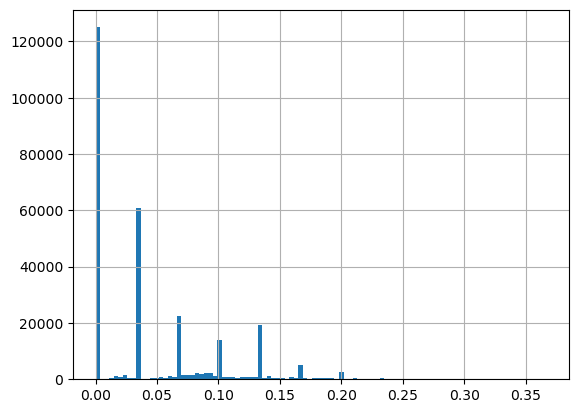

In [67]:
df["complexity"].hist(bins=100)

In [68]:
np.sum((df["complexity"] >= 0.04)&(df["complexity"] < 0.3))

98634

In [69]:
df_selected = df[(df["complexity"] >= 0.04)&(df["complexity"] < 0.3)]

In [70]:
import random
def return_template(instruction, output):
    
    prompt = f"""-- Database schema:\n\n{instruction}"""

    messages = []
    choices = random.randint(1, 4)
    if choices == 2:
        messages.append(
            {
                "role": "system",
                "content": f"You are an Text2SQL Agent. You need to return the SQL query based on user request."
            }
        )
    messages.append(
        {
            "role": "user",
            "content": prompt
        }
    )
    messages.append(
        {
            "role": "assistant",
            "content": output
        }
    )

    return messages

df_selected["template"] = df_selected.apply(lambda x: return_template(x["instruction"], x["output"]), axis=1)

/tmp/ipykernel_23493/3814342029.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["template"] = df_selected.apply(lambda x: return_template(x["instruction"], x["output"]), axis=1)


In [71]:
output = df_selected["template"].tolist()
output_path = '../data/train_nstext2sql.json'

result = []
for obj in output:
    result.append(
        {
            "messages": obj
        }
    )

with open(output_path, 'w') as f:
    f.write(json.dumps(result, indent=4))

In [38]:
synthetic_path = '../data/synthetic_text_to_sql_train.snappy.parquet'

df = pd.read_parquet(synthetic_path)

In [40]:
def wrapper_analyze_sql_complexity(sql_query):
    result = analyze_sql_complexity(sql_query)
    
    return result["complexity_score"]

In [41]:
df

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation
0,5097,forestry,Comprehensive data on sustainable forest manag...,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",What is the total volume of timber sold by eac...,"CREATE TABLE salesperson (salesperson_id INT, ...","SELECT salesperson_id, name, SUM(volume) as to...","Joins timber_sales and salesperson tables, gro..."
1,5098,defense industry,"Defense contract data, military equipment main...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",List all the unique equipment types and their ...,CREATE TABLE equipment_maintenance (equipment_...,"SELECT equipment_type, SUM(maintenance_frequen...",This query groups the equipment_maintenance ta...
2,5099,marine biology,"Comprehensive data on marine species, oceanogr...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",How many marine species are found in the South...,"CREATE TABLE marine_species (name VARCHAR(50),...",SELECT COUNT(*) FROM marine_species WHERE loca...,This query counts the number of marine species...
3,5100,financial services,Detailed financial data including investment s...,aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",What is the total trade value and average pric...,"CREATE TABLE trade_history (id INT, trader_id ...","SELECT trader_id, stock, SUM(price * quantity)...",This query calculates the total trade value an...
4,5101,energy,Energy market data covering renewable energy s...,window functions,"window functions (e.g., ROW_NUMBER, LEAD, LAG,...",analytics and reporting,"generating reports, dashboards, and analytical...",Find the energy efficiency upgrades with the h...,"CREATE TABLE upgrades (id INT, cost FLOAT, typ...","SELECT type, cost FROM (SELECT type, cost, ROW...",The SQL query uses the ROW_NUMBER function to ...
...,...,...,...,...,...,...,...,...,...,...,...
99995,89651,nonprofit,"Nonprofit data on charitable giving trends, so...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",Which programs had the highest volunteer parti...,"CREATE TABLE programs (program_id INT, num_vol...","SELECT program_id, (num_volunteers / total_par...",This query calculates the participation rate f...
99996,89652,retail,"Retail data on circular supply chains, ethical...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",What is the number of fair-trade certified acc...,"CREATE TABLE products (product_id INT, product...",SELECT COUNT(*) FROM products WHERE is_fair_tr...,The query counts the number of fair-trade cert...
99997,89653,fitness industry,"Workout data, membership demographics, wearabl...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",Find the user with the longest workout session...,"CREATE TABLE workout_sessions (id INT, user_id...","SELECT u.name, MAX(session_duration) as max_du...",The query joins the workout_sessions and users...
99998,89654,space exploration,"Spacecraft manufacturing data, space mission r...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",How many space missions were completed by each...,"CREATE TABLE SpaceMissions (id INT, astronaut_...","SELECT a.name, COUNT(sm.id) FROM Astronauts a ...",This query calculates the number of space miss...


In [43]:
df["score"] = df["sql"].apply(wrapper_analyze_sql_complexity)

<Axes: >

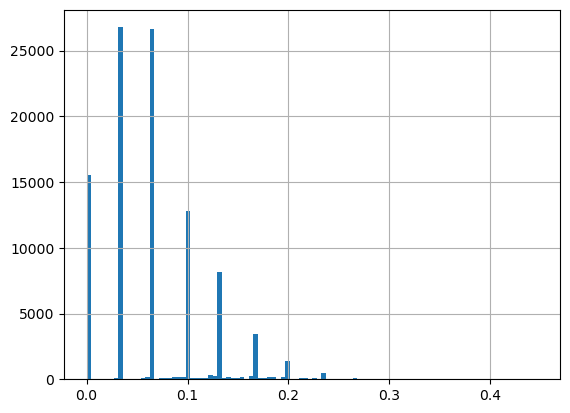

In [44]:
df["score"].hist(bins=100)

In [53]:
np.sum((df["score"] >= 0.03)&(df["score"] < 0.3))

84286

In [54]:
df_selected = df[(df["score"] >= 0.03)&(df["score"] < 0.3)]

In [59]:
def template_synthetic(sql_prompt, sql_context, sql, sql_explanation):
        
        prompt = (f"""### Database schema:\n\n```sql\n{sql_context}\n```\n""",
                    f"""### User query:\n\n{sql_prompt}\n\n""",
                    "Return the SQL query and give detailed explaination based on user request.\n\n")

        prompt = "".join(prompt)
    
        messages = []
        choices = random.randint(1, 4)
        if choices == 2:
            messages.append(
                {
                    "role": "system",
                    "content": f"You are an Text2SQL Agent."
                }
            )
        messages.append(
            {
                "role": "user",
                "content": prompt
            }
        )
        messages.append(
            {
                "role": "assistant",
                "content": f'### SQL Query:\n```sql\n{sql}\n```\n\n### Explanation:\n{sql_explanation}'
            }
        )
    
        return messages

In [60]:
df_selected["template"] = df_selected.apply(lambda x: template_synthetic(x["sql_prompt"], x["sql_context"], x["sql"], x["sql_explanation"]), axis=1)

/tmp/ipykernel_23493/378388645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["template"] = df_selected.apply(lambda x: template_synthetic(x["sql_prompt"], x["sql_context"], x["sql"], x["sql_explanation"]), axis=1)


In [61]:
output = df_selected["template"].tolist()
output_path = '../data/synthetic_text_to_sql_train_nstext2sql.json'

return_json = []
for line in output:
    return_json.append({
        "messages": line
    })
with open(output_path, 'w') as f:
    f.write(json.dumps(return_json, indent=4))

In [1]:
import tiktoken

def count_tokens(text: str, model: str = "gpt-4") -> int:
    # Select the tokenizer for the model
    encoding = tiktoken.encoding_for_model(model)
    tokens = encoding.encode(text)
    return len(tokens)

In [14]:
import json
path = '../data/train_nstext2sql.json'
with open(path, 'r') as f:
    data = json.load(f)

In [15]:
data[0]

{'messages': [{'role': 'user',
   'content': '-- Database schema:\n\nCREATE TABLE Comments (\n    Id number,\n    PostId number,\n    Score number,\n    Text text,\n    CreationDate time,\n    UserDisplayName text,\n    UserId number,\n    ContentLicense text\n)\n\nCREATE TABLE ReviewRejectionReasons (\n    Id number,\n    Name text,\n    Description text,\n    PostTypeId number\n)\n\nCREATE TABLE Badges (\n    Id number,\n    UserId number,\n    Name text,\n    Date time,\n    Class number,\n    TagBased boolean\n)\n\nCREATE TABLE Users (\n    Id number,\n    Reputation number,\n    CreationDate time,\n    DisplayName text,\n    LastAccessDate time,\n    WebsiteUrl text,\n    Location text,\n    AboutMe text,\n    Views number,\n    UpVotes number,\n    DownVotes number,\n    ProfileImageUrl text,\n    EmailHash text,\n    AccountId number\n)\n\nCREATE TABLE TagSynonyms (\n    Id number,\n    SourceTagName text,\n    TargetTagName text,\n    CreationDate time,\n    OwnerUserId number,

In [16]:
total_tokens = 0
num = 1
s = 0
u = 0
a = 0
max_tokens = 0
more_than_512 = 0
more_than_1024 = 0
more_than_2048 = 0
more_than_4096 = 0

for line in data:
    messages = line["messages"]
    l_len = 0
    for message in messages:
        if message["role"] == "system":
            ls = count_tokens(message["content"])
            l_len += ls
            s += ls
        elif message["role"] == "user":
            lu = count_tokens(message["content"])
            l_len += lu
            u += lu
        elif message["role"] == "assistant":
            la = count_tokens(message["content"])
            l_len += la
            a += la
    if l_len > max_tokens:
        max_tokens = l_len

    if l_len > 512:
        more_than_512 += 1
    if l_len > 1024:
        more_than_1024 += 1
    if l_len > 2048:
        more_than_2048 += 1
    if l_len > 4096:
        more_than_4096 += 1

    num += 1

total_tokens = s + u + a
total_tokens, s, u, a
    

(74431940, 489280, 62952192, 10990468)

In [17]:
max_tokens, more_than_512, more_than_1024, more_than_2048, more_than_4096

(2589, 53798, 30222, 2218, 0)

In [18]:
num

98635

In [20]:
import random

# Sample 80% of the data
train_data = random.sample(data, int(0.8 * len(data)))


In [21]:
output_path = '../data/train_nstext2sql_80.json'
with open(output_path, 'w') as f:
    f.write(json.dumps(train_data, indent=4))